In [23]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importing credit card data

In [25]:
df = pd.read_csv('CREDIT CARD USERS DATA.csv')

## Calculating total spent

In [26]:
df['total_spent_on_card'] = df['cardspent'] + df['card2spent']

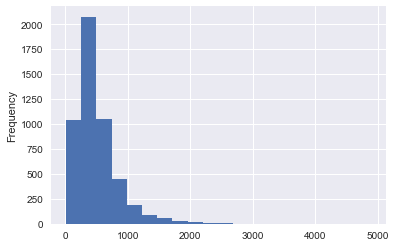

In [27]:
df['total_spent_on_card'].plot.hist(bins=20)

In [28]:
df['total_spent_on_card'].describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: total_spent_on_card, dtype: float64

# Segregating the correlated variables

In [29]:
p = Series(df.corr()['total_spent_on_card']).sort_values(ascending=0)[:15]
p

total_spent_on_card    1.000000
cardspent              0.941492
card2spent             0.825244
card2items             0.403740
carditems              0.391936
lninc                  0.388889
inccat                 0.373366
income                 0.372731
carvalue               0.317027
othdebt                0.292554
creddebt               0.265115
carcatvalue            0.206938
owndvd                 0.131962
ownvcr                 0.127891
owncd                  0.115810
Name: total_spent_on_card, dtype: float64

In [30]:
df['total_spent_on_card'].median()

414.25

# Removing outliers from total spent on cards

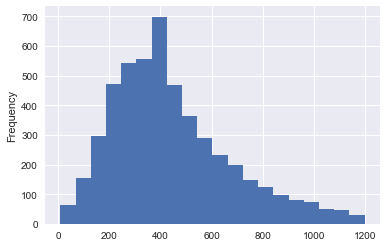

In [31]:
df['total_spent_on_card'] = np.where(df['total_spent_on_card']>1200, 414.25, df['total_spent_on_card'])
df['total_spent_on_card'].plot.hist(bins=20)

In [32]:
df[p.index].describe()

,total_spent_on_card,cardspent,card2spent,card2items,carditems,lninc,inccat,income,carvalue,othdebt,creddebt,carcatvalue,owndvd,ownvcr,owncd
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,444.500044,337.202520,160.876110,4.666600,10.17740,3.699840,2.392200,54.759600,23.232580,3.654456,1.857364,1.389400,0.913600,0.915600,0.932800
std,234.320785,245.145068,146.292771,2.497017,3.39114,0.746945,1.221261,55.377511,21.231637,5.395214,3.415789,1.081296,0.280982,0.278015,0.250393
min,8.110000,0.000000,0.000000,0.000000,0.00000,2.200000,1.000000,9.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,276.282500,183.377500,66.967500,3.000000,8.00000,3.180000,1.000000,24.000000,9.200000,0.980000,0.390000,1.000000,1.000000,1.000000,1.000000
50%,414.185000,276.360000,125.340000,5.000000,10.00000,3.640000,2.000000,38.000000,17.000000,2.100000,0.930000,1.000000,1.000000,1.000000,1.000000
75%,567.125000,418.537500,208.310000,6.000000,12.00000,4.200000,3.000000,67.000000,31.100000,4.310000,2.060000,2.000000,1.000000,1.000000,1.000000
max,1198.420000,3926.410000,2069.250000,15.000000,23.00000,6.980000,5.000000,1073.000000,99.600000,141.460000,109.070000,3.000000,1.000000,1.000000,1.000000


In [33]:
d = df[p.index]

In [34]:
X = d.drop(['total_spent_on_card', 'cardspent', 'card2spent'], axis=1)
Y = d['total_spent_on_card']

# Splitting the data into train and test

In [35]:
X1, X2, Y1, Y2 = train_test_split(X, Y, train_size=0.7, random_state=125)

In [36]:
print X1.shape
print X2.shape
print Y1.shape
print Y2.shape

(3500, 12)
(1500, 12)
(3500L,)
(1500L,)


# Scaling data

In [37]:
sc = StandardScaler().fit(X1)
sc1 = sc.transform(X1)
sc2 = sc.transform(X2)

# Building models and comparing RMSE values for train and test

-----------------------------------------------------
Train 177.185564761
Test 181.78645987
-----------------------------------------------------


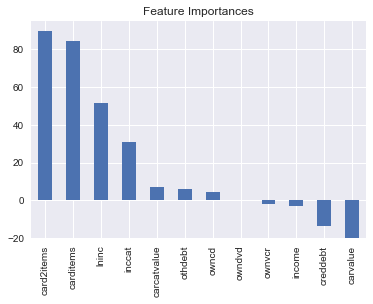

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lm=LinearRegression()
lm.fit(sc1,Y1)
rmse_lm_train=np.sqrt((((lm.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_lm_test=np.sqrt((((lm.predict(sc2)-Y2)**2).sum())/len(X2))
print '-----------------------------------------------------'
print 'Train' , rmse_lm_train
print 'Test' , rmse_lm_test
print '-----------------------------------------------------'
Series(lm.coef_, X.columns).sort_values(ascending=0).plot(kind='bar', title='Feature Importances')

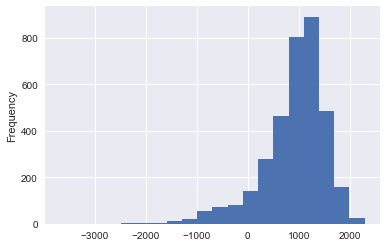

In [39]:
Series(lm.predict(X1)-Y1).plot.hist(bins=20)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_features='auto', 
                           min_samples_split=1200, max_depth=10, min_samples_leaf=75)
rf.fit(sc1,Y1)
rmse_rf_train=np.sqrt((((rf.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_rf_test=np.sqrt((((rf.predict(sc2)-Y2)**2).sum())/len(X2))

print '-----------------------------------------------------'
print 'Train:' , rmse_rf_train
print 'Test:' , rmse_rf_test
print '-----------------------------------------------------'

-----------------------------------------------------
Train: 203.786414821
Test: 210.003551332
-----------------------------------------------------


In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet
el = ElasticNet()

params = {
    'alpha': [0.01, 0.1, 10, 100, 1000],
    'l1_ratio': [0.1, 0.5, 1.0]
}

gs_el = GridSearchCV(el, params, cv=25, scoring='mean_squared_error')
gs_el.fit(sc1, Y1)

print '-----------------------------------------------------'
print gs_el.best_estimator_
print gs_el.best_params_
print gs_el.best_score_
print '-----------------------------------------------------'
print sorted(gs_el.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:2]
print '-----------------------------------------------------'
rmse_gs_el_train=np.sqrt((((gs_el.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_gs_el_test=np.sqrt((((gs_el.predict(sc2)-Y2)**2).sum())/len(X2))
print rmse_gs_el_train
print rmse_gs_el_test

-----------------------------------------------------
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.01, 'l1_ratio': 0.1}
-31608.8866038
-----------------------------------------------------
[mean: -31608.88660, std: 5213.80950, params: {'alpha': 0.01, 'l1_ratio': 0.1}, mean: -31610.98592, std: 5211.76346, params: {'alpha': 0.01, 'l1_ratio': 0.5}]
-----------------------------------------------------
177.193422813
181.796254828


In [42]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=8)

params = {'n_neighbors': [8, 10, 12], 'p': [2, 3]}

gs_kn = GridSearchCV(kn, params, cv=25, scoring='mean_squared_error')
gs_kn.fit(sc1, Y1)

print '-----------------------------------------------------'
print gs_kn.best_estimator_
print gs_kn.best_params_
print gs_kn.best_score_
print '-----------------------------------------------------'
print sorted(gs_kn.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:2]
print '-----------------------------------------------------'
rmse_gs_kn_train=np.sqrt((((gs_kn.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_gs_kn_test=np.sqrt((((gs_kn.predict(sc2)-Y2)**2).sum())/len(X2))
print rmse_gs_kn_train
print rmse_gs_kn_test

-----------------------------------------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=3,
          weights='uniform')
{'n_neighbors': 12, 'p': 3}
-34017.4171352
-----------------------------------------------------
[mean: -34017.41714, std: 5231.42453, params: {'n_neighbors': 12, 'p': 3}, mean: -34018.96421, std: 5309.61448, params: {'n_neighbors': 12, 'p': 2}]
-----------------------------------------------------
169.677980402
189.081033184


# SVR is a very time consuming process, better to avoid running 

In [43]:
from sklearn.svm import SVR 
svr = SVR()

params = {
    'kernel': ['rbf'],
   # 'gamma': [0.5, 1.0],
    'C': [0.1, 10, 100, 1000]
}

gs_svr = GridSearchCV(svr, params, cv=5, scoring='mean_squared_error')
gs_svr.fit(sc1, Y1)
print '-----------------------------------------------------'
print gs_svr.best_estimator_
print gs_svr.best_params_
print gs_svr.best_score_
print '-----------------------------------------------------'
rmse_gs_svr_train=np.sqrt((((gs_svr.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_gs_svr_test=np.sqrt((((gs_svr.predict(sc2)-Y2)**2).sum())/len(X2))
print 'Train:' , rmse_gs_svr_train
print 'Test:' , rmse_gs_svr_test
print '-----------------------------------------------------'

-----------------------------------------------------
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
{'kernel': 'rbf', 'C': 100}
-33326.4871897
-----------------------------------------------------
Train: 176.295544626
Test: 187.437423618
-----------------------------------------------------


In [44]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(subsample=.8)

params = {
    'n_estimators': [75, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [2, 3, 4, 5],
    'alpha': [0.85]
}

gs_gb = GridSearchCV(gb, params, cv=5, scoring='mean_squared_error')
gs_gb.fit(sc1, Y1)
print '-----------------------------------------------------'
print gs_gb.best_estimator_
print gs_gb.best_params_
print gs_gb.best_score_
print '-----------------------------------------------------'
rmse_gs_gb_train=np.sqrt((((gs_gb.predict(sc1)-Y1)**2).sum())/len(X1))
rmse_gs_gb_test=np.sqrt((((gs_gb.predict(sc2)-Y2)**2).sum())/len(X2))
print 'Train:' , rmse_gs_gb_train
print 'Test:' , rmse_gs_gb_test
print '-----------------------------------------------------'

-----------------------------------------------------
GradientBoostingRegressor(alpha=0.85, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=0.5,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=75, presort='auto',
             random_state=None, subsample=0.8, verbose=0, warm_start=False)
{'max_features': 0.5, 'alpha': 0.85, 'learning_rate': 0.1, 'n_estimators': 75, 'max_depth': 2}
-31758.3477204
-----------------------------------------------------
Train: 172.19519112
Test: 181.792806439
-----------------------------------------------------


### <big><b>Further exploring data to get some insights, but didn't work

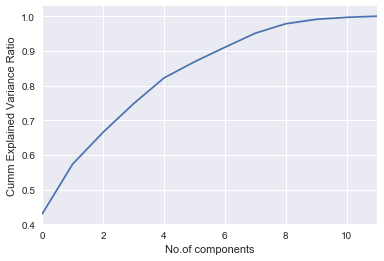

In [49]:
pc = PCA(n_components=12).fit(sc1)
d = Series(pc.explained_variance_ratio_).cumsum().plot()
d.set_xlabel('No.of components')
d.set_ylabel('Cumm Explained Variance Ratio')

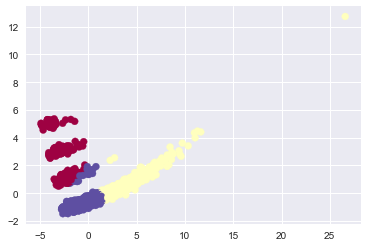

In [50]:
pc = PCA(n_components=2).fit(sc1)
pc1 = pc.transform(sc1)
km = KMeans(n_clusters=3).fit(pc1)
plt.scatter(pc1[:,0], pc1[:,1], c=km.labels_, cmap='Spectral')

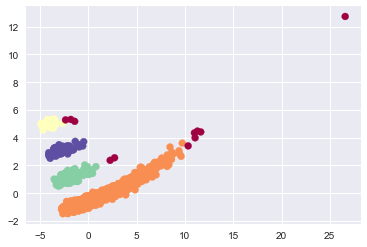

In [54]:
pc = PCA(n_components=2).fit(sc1)
pc1 = pc.transform(sc1)
db = DBSCAN(eps=0.75).fit(pc1)
plt.scatter(pc1[:,0], pc1[:,1], c=db.labels_, cmap='Spectral')

In [56]:
pc = PCA(n_components=8).fit(sc1)
pc_train = DataFrame(pc.transform(sc1), columns=['PC_' + str(i) for i in range(8)])
pc_test = DataFrame(pc.transform(sc2), columns=['PC_' + str(i) for i in range(8)])
pc_train['cluster']=db.labels_
pc_test['cluster']=db.fit_predict(pc_test)

from sklearn.linear_model import LinearRegression, Lasso, Ridge
lm=LinearRegression()
lm.fit(pc_train,Y1)
rmse_lm_train=np.sqrt((((lm.predict(pc_train)-Y1)**2).sum())/len(X1))
rmse_lm_test=np.sqrt((((lm.predict(pc_test)-Y2)**2).sum())/len(X2))
print '-----------------------------------------------------'
print 'Train' , rmse_lm_train
print 'Test' , rmse_lm_test
print '-----------------------------------------------------'
#Series(lm.coef_, X.columns).sort_values(ascending=0).plot(kind='bar', title='Feature Importances')

DataFrame(pd.concat([Y1.sort_index(), pc_train['cluster']], axis=1)).groupby('cluster').mean()

-----------------------------------------------------
Train 177.78836294
Test 182.921607869
-----------------------------------------------------


,total_spent_on_card
cluster,
-1.0,549.824444
0.0,443.623585
1.0,437.267015
2.0,432.034225
3.0,468.191263
